# Red Wine Analysis

***import some important libraries***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***1. Load the dataset***

In [7]:
# 1. Load the dataset:
df5 = pd.read_csv(r"C:\Users\ASUS\Downloads\winequality-red.csv")

In [40]:
df5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
# Quick sanity check
print(df5.head())
print(df5.info())
print(df5.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [44]:
# List of feature columns (everything except quality)
feature_cols = [c for c in df5.columns if c != "quality"]

***2. Univariate distributions***

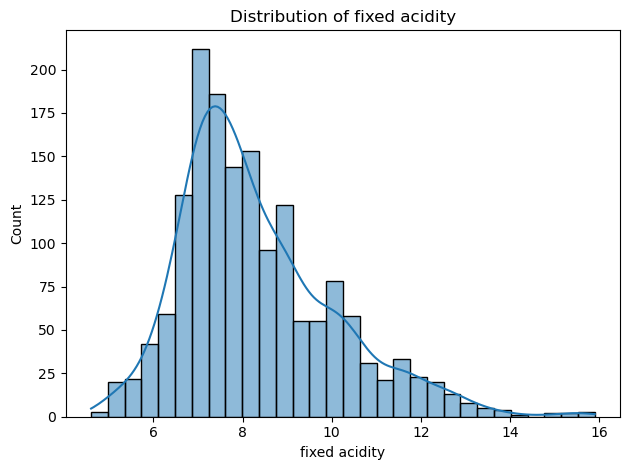

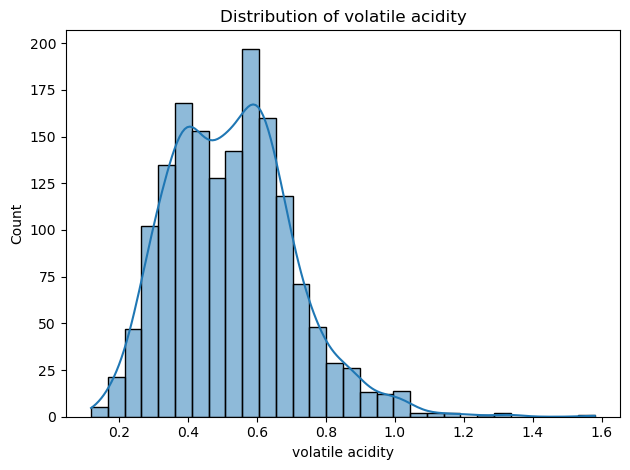

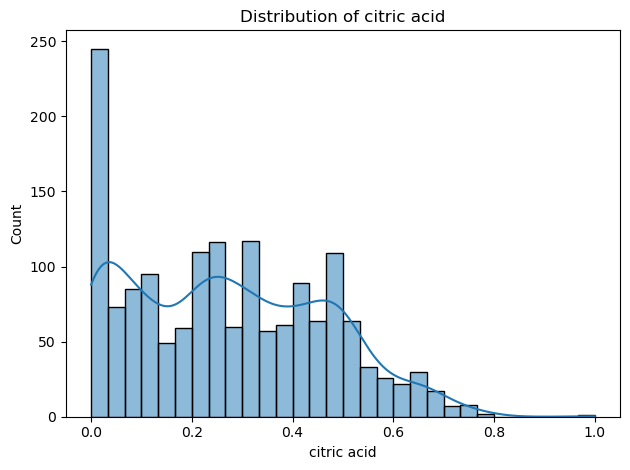

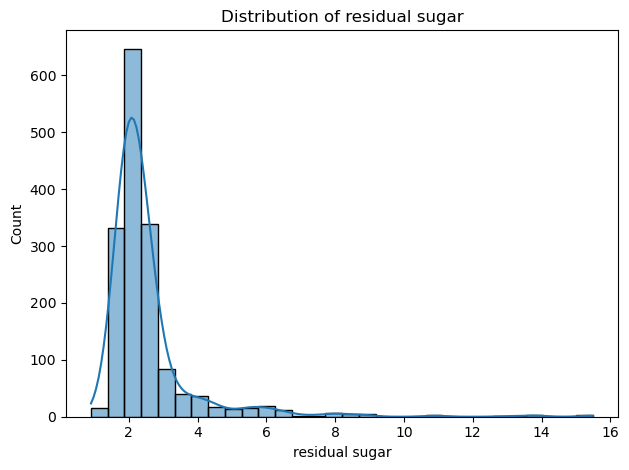

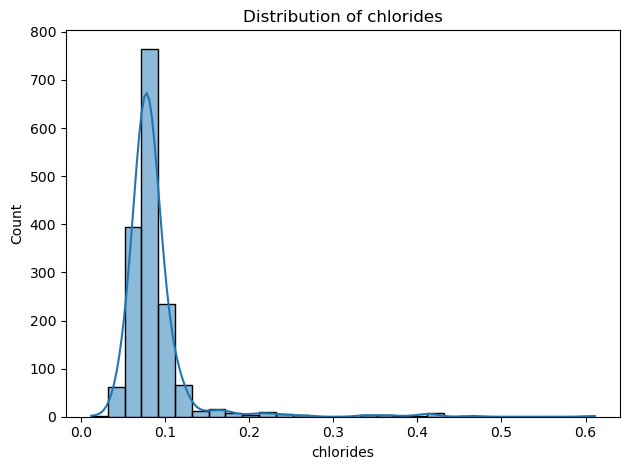

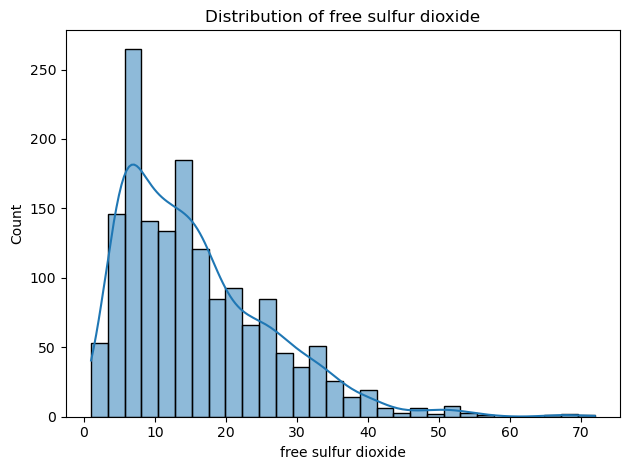

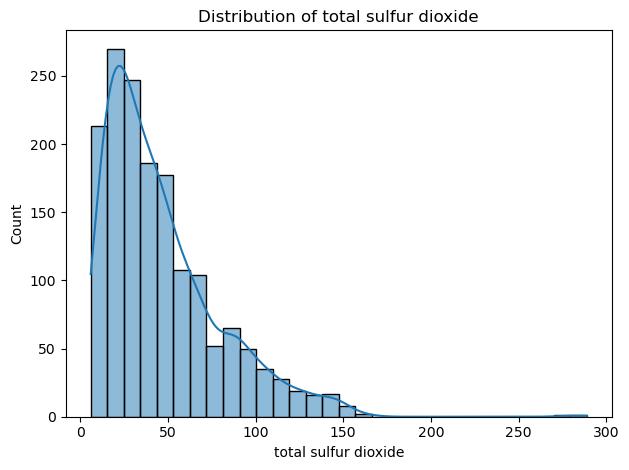

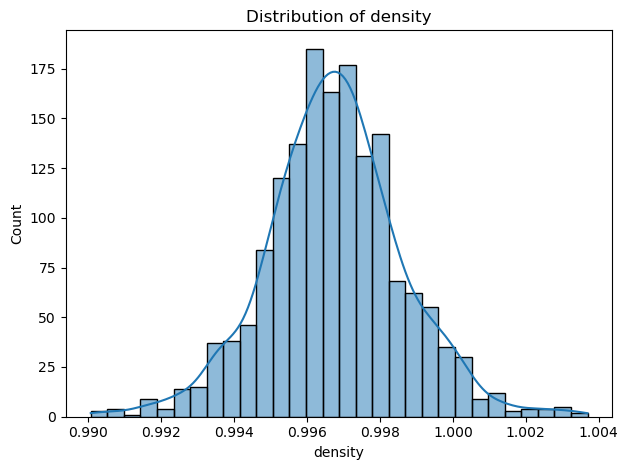

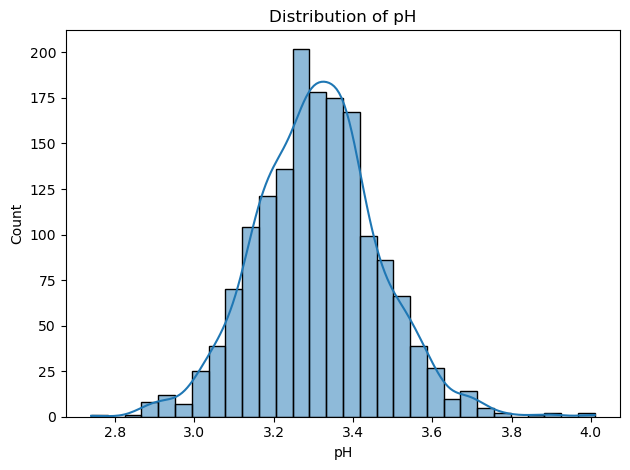

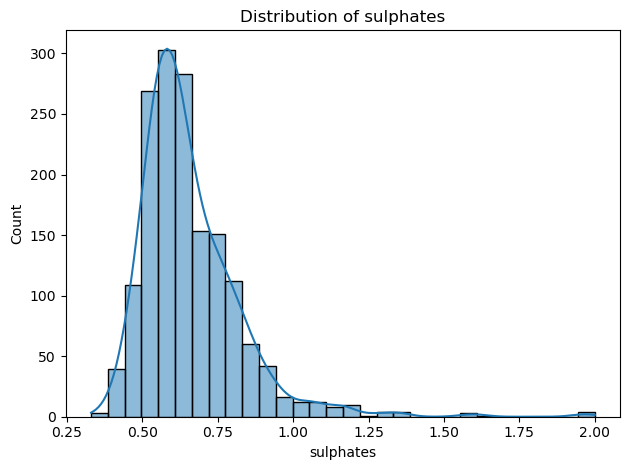

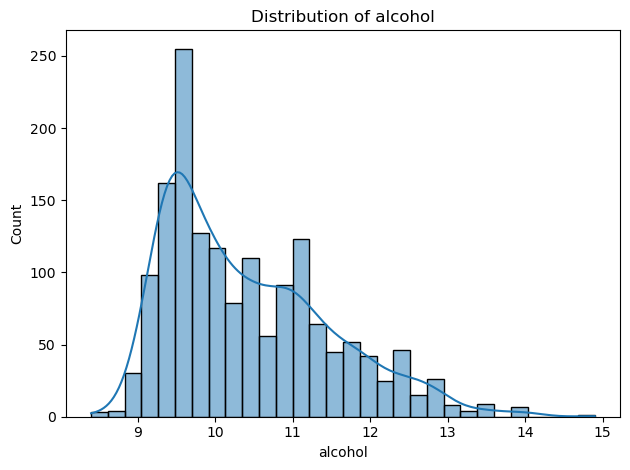

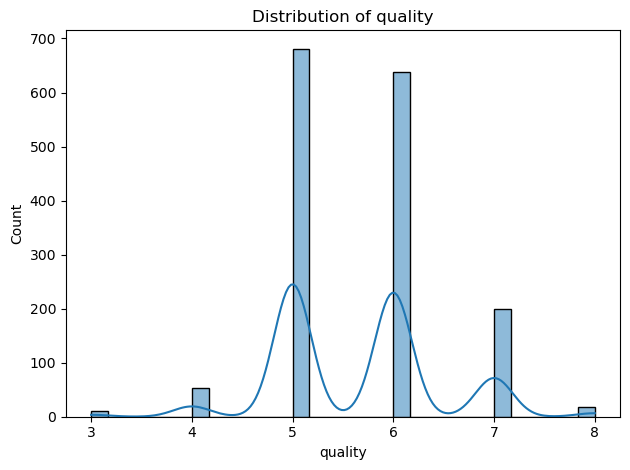

In [45]:
# 2.1 Histogram + KDE for each numeric variable
for col in df5.columns:
    plt.figure()
    sns.histplot(data=df5, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

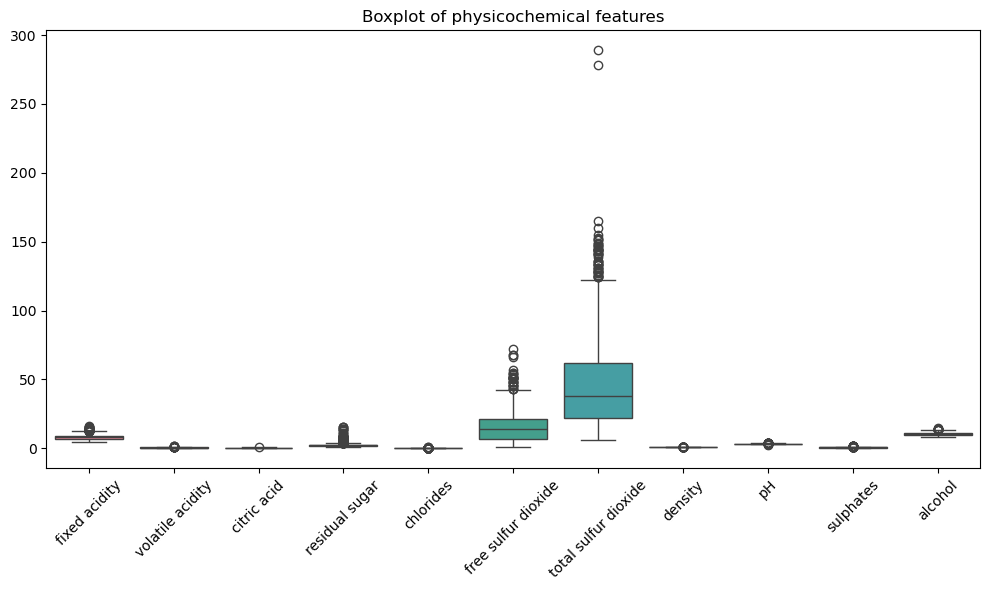

In [47]:
# 2.2 Boxplot for each numeric variable to view spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df5[feature_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of physicochemical features")
plt.tight_layout()
plt.show()

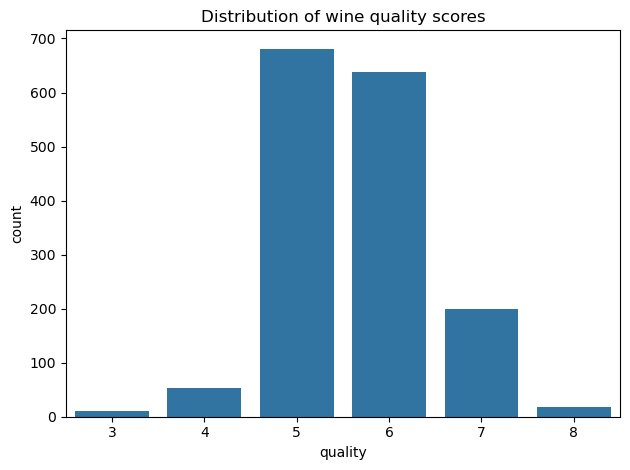

In [48]:
# 2.3 Bar plot of quality counts (quality is discrete 0–10 in this dataset). [web:6]
plt.figure()
sns.countplot(data=df5, x="quality")
plt.title("Distribution of wine quality scores")
plt.tight_layout()
plt.show()

***============================
3. Feature vs. quality plots
============================***

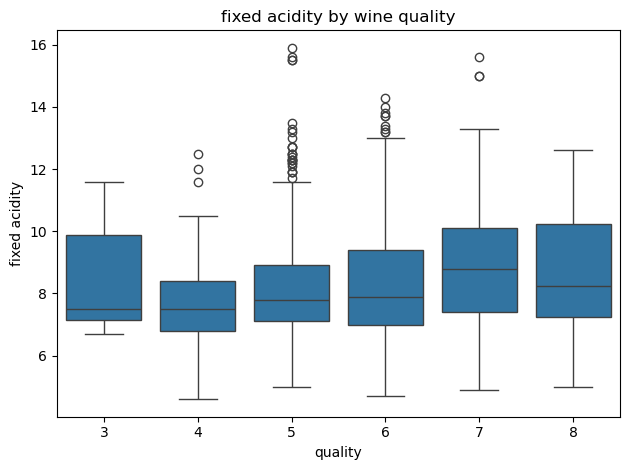

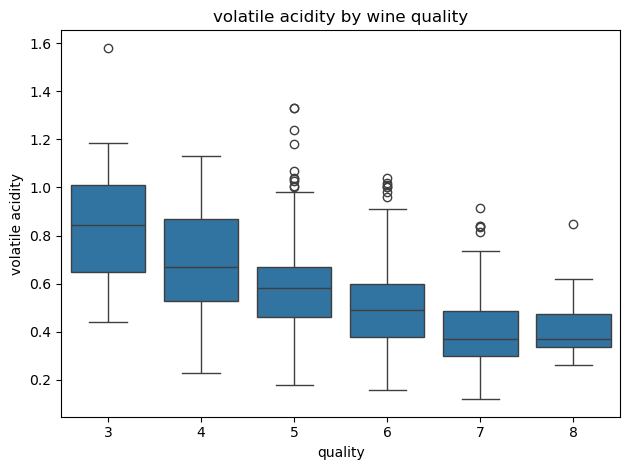

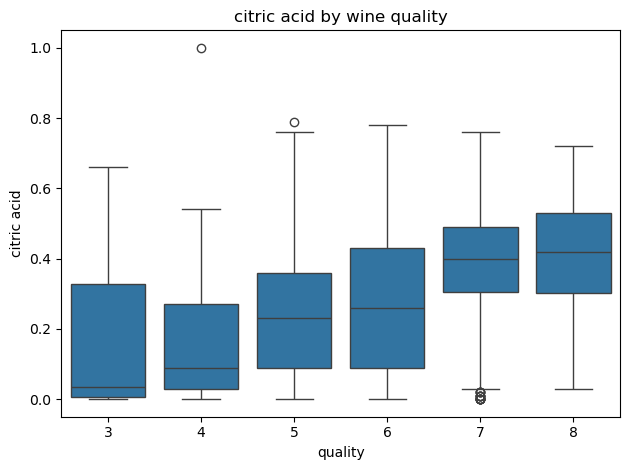

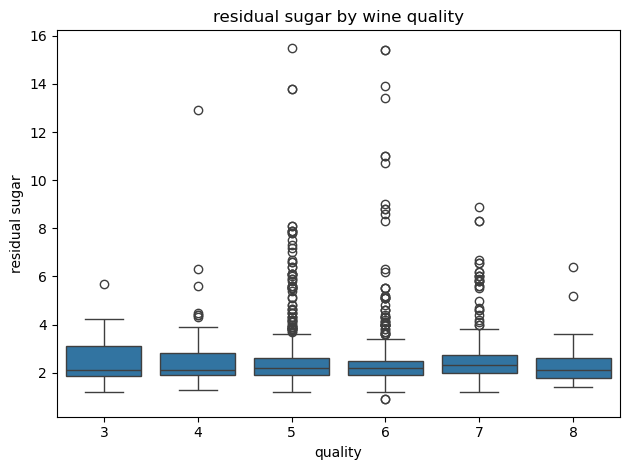

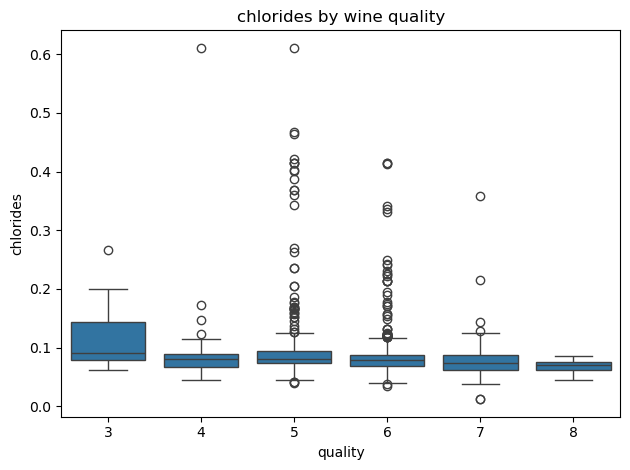

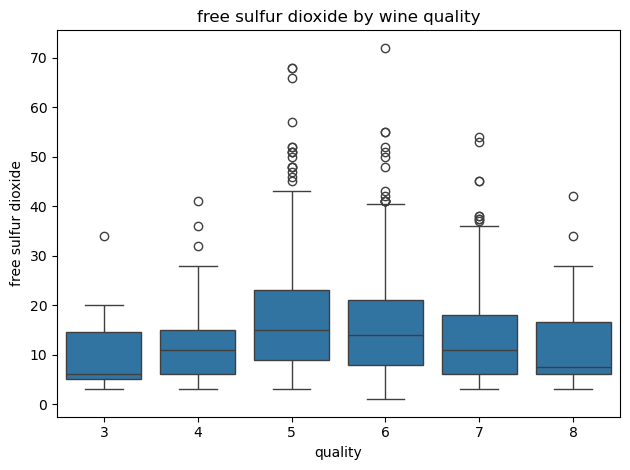

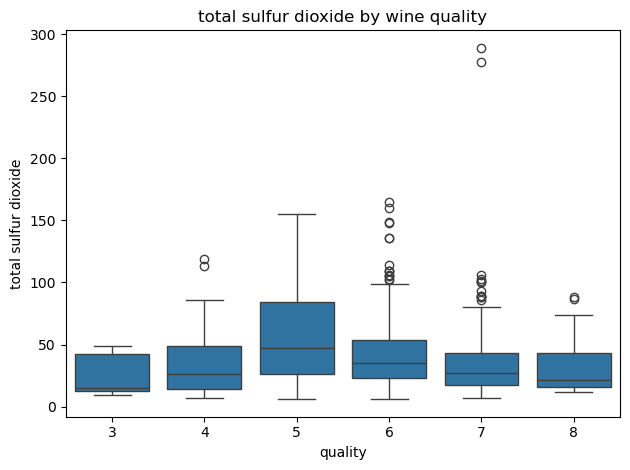

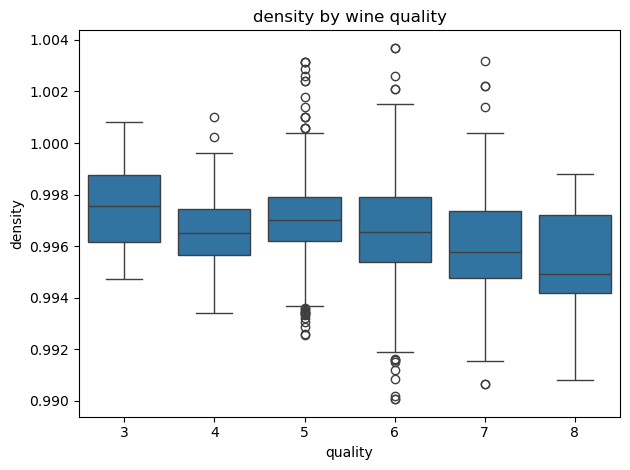

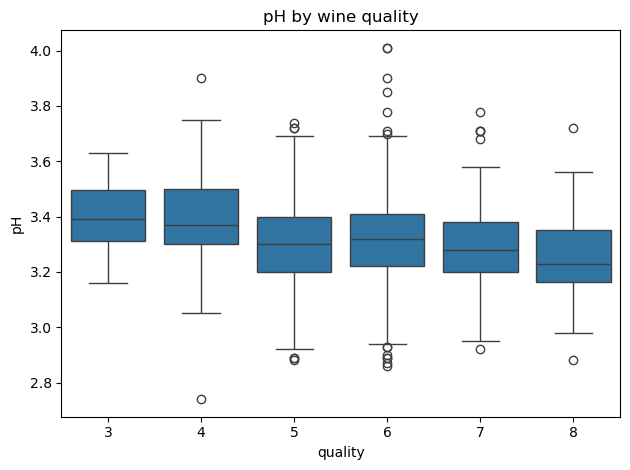

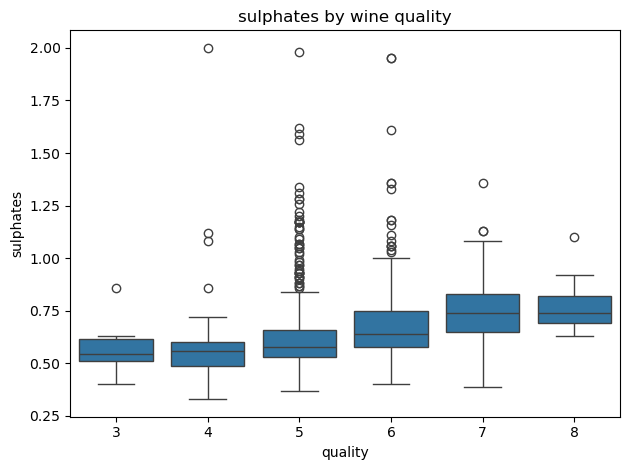

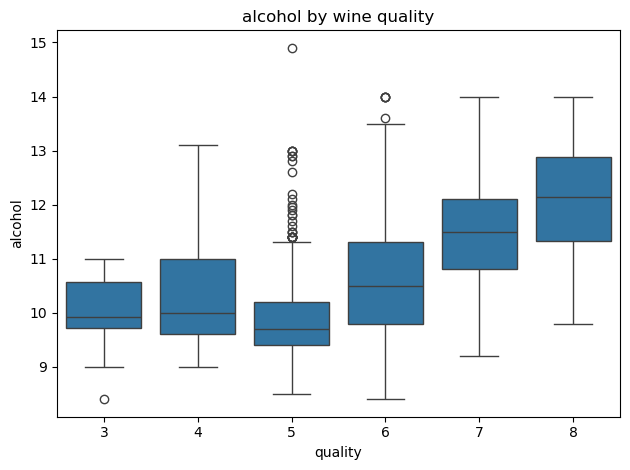

In [50]:
# 3.1 Boxplots of each feature grouped by quality
for col in feature_cols:
    plt.figure()
    sns.boxplot(data=df5, x="quality", y=col)
    plt.title(f"{col} by wine quality")
    plt.tight_layout()
    plt.show()

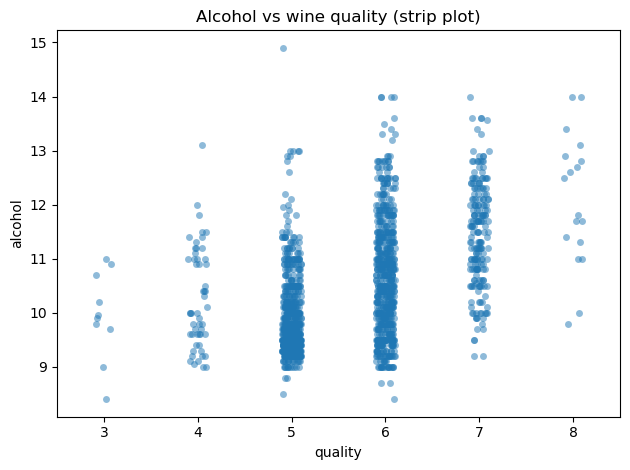

In [51]:
# 3.2 Swarm/strip plot (can be heavy; use for a few key variables like alcohol)
plt.figure()
sns.stripplot(data=df5, x="quality", y="alcohol", jitter=True, alpha=0.5)
plt.title("Alcohol vs wine quality (strip plot)")
plt.tight_layout()
plt.show()

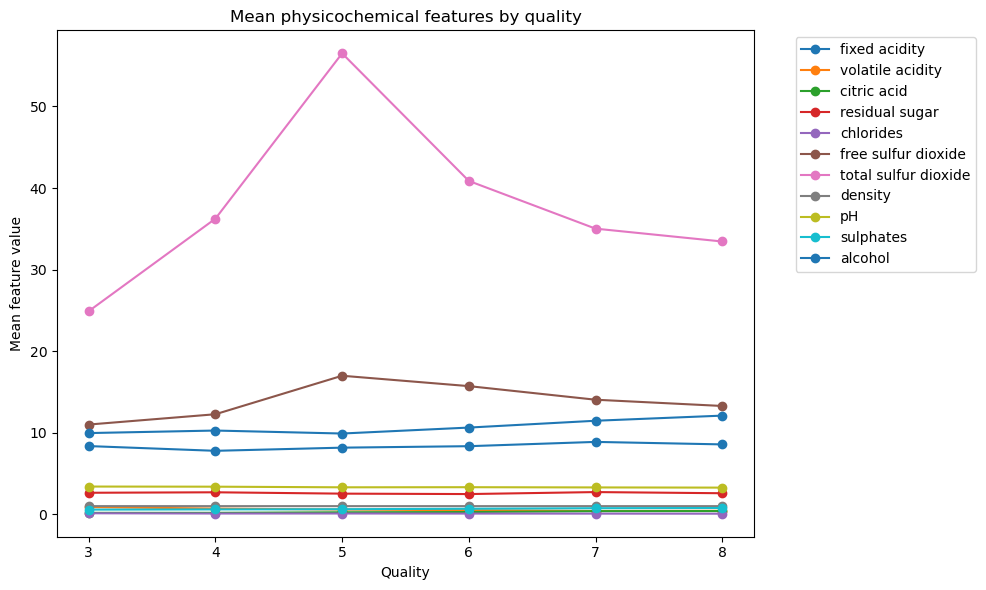

In [52]:
# 3.3 Mean feature values by quality (line plots)
mean_by_quality = df5.groupby("quality")[feature_cols].mean()
plt.figure(figsize=(10, 6))
for col in feature_cols:
    plt.plot(mean_by_quality.index, mean_by_quality[col], marker="o", label=col)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Quality")
plt.ylabel("Mean feature value")
plt.title("Mean physicochemical features by quality")
plt.tight_layout()
plt.show()

***============================
4. Feature–feature relationships
============================***

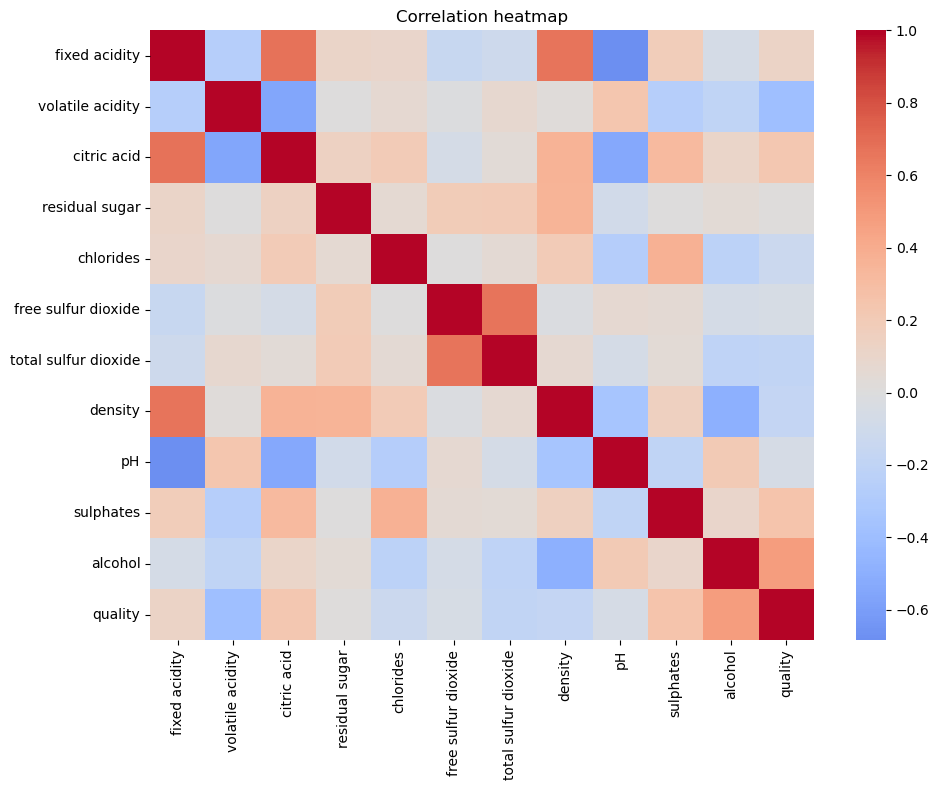

In [53]:
# 4.1 Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr = df5.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

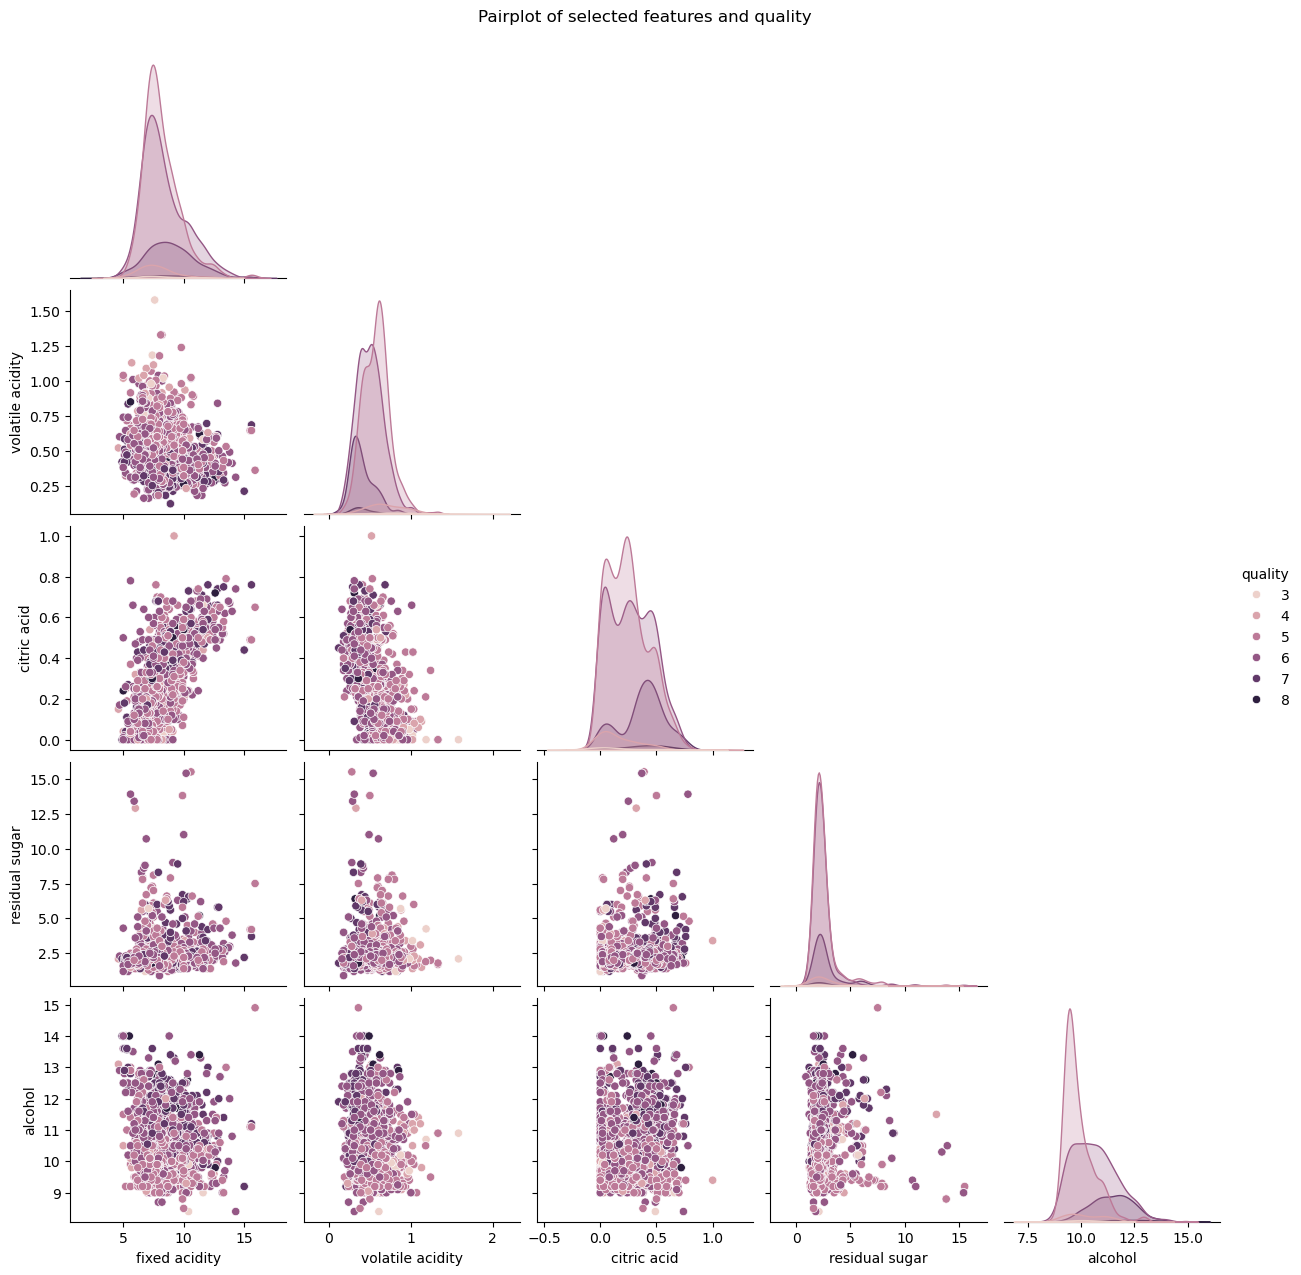

In [54]:
# 4.2 Pairplot (scatterplot matrix) – can be heavy; you can limit to a subset
subset_cols = ["fixed acidity", "volatile acidity", "citric acid",
               "residual sugar", "alcohol", "quality"]
sns.pairplot(df5[subset_cols], hue="quality", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of selected features and quality", y=1.02)
plt.show()

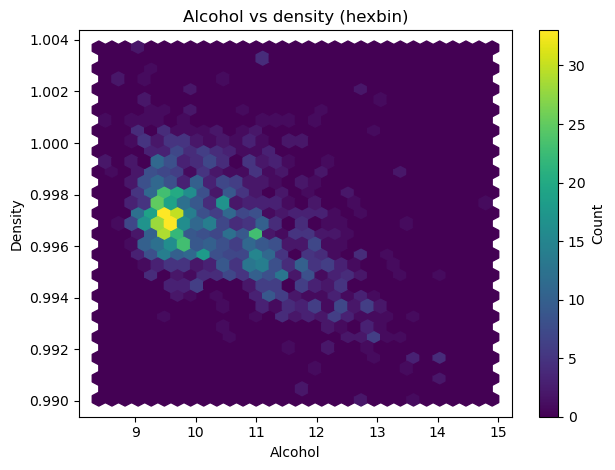

In [56]:
# 4.3 Example 2D density/hexbin plot: alcohol vs density
plt.figure()
plt.hexbin(df5["alcohol"], df5["density"], gridsize=30, cmap="viridis")
plt.colorbar(label="Count")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.title("Alcohol vs density (hexbin)")
plt.tight_layout()
plt.show()

***============================
5. Multivariate visualizations
 ============================***

In [62]:
# 5.1 PCA scatter plot colored by quality
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
# Standardize features before PCA
X = df5[feature_cols].values
y = df5["quality"].values

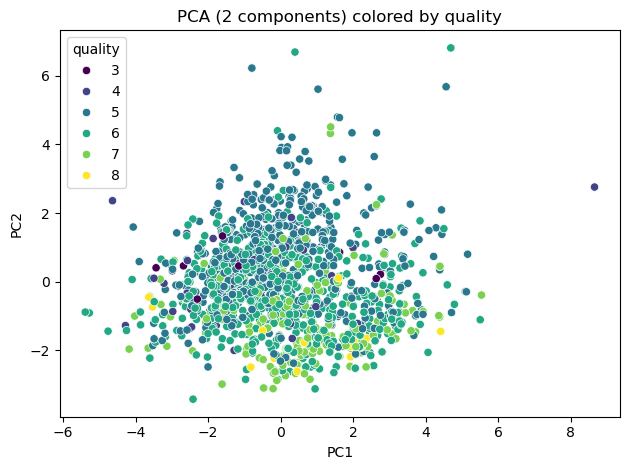

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "quality": y
})

plt.figure()
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="quality", palette="viridis")
plt.title("PCA (2 components) colored by quality")
plt.tight_layout()
plt.show()

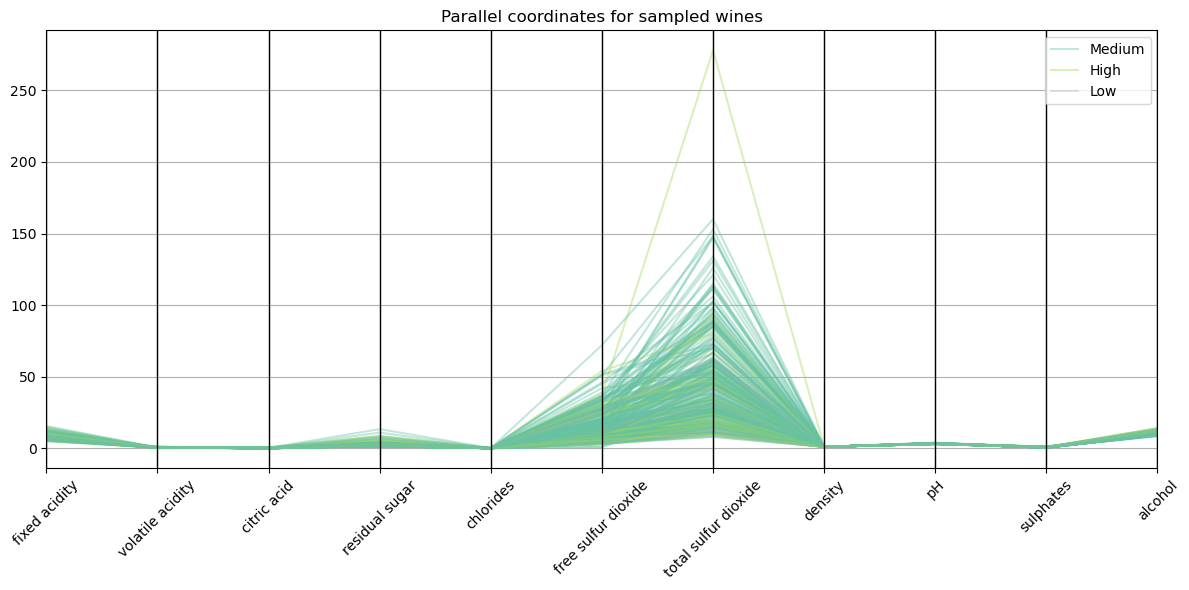

In [69]:
# 5.2 Parallel coordinates plot for a sample of rows
from pandas.plotting import parallel_coordinates

# Take a manageable sample and bin quality into categories for clarity.
sample = df5.sample(n=300, random_state=42).copy()
sample["quality_cat"] = pd.cut(
    sample["quality"],
    bins=[0, 4, 6, 10],
    labels=["Low", "Medium", "High"]
)

plt.figure(figsize=(12, 6))
parallel_coordinates(sample[feature_cols + ["quality_cat"]],
                     class_column="quality_cat",
                     colormap=plt.get_cmap("Set2"), alpha=0.4)
plt.xticks(rotation=45)
plt.title("Parallel coordinates for sampled wines")
plt.tight_layout()
plt.show()

***============================
6. Optional: simple model + feature importance (tree model)
============================***

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [76]:
# For modeling, convert quality to classification (e.g., Low/Med/High) [web:20]
df5["quality_cat"] = pd.cut(
    df5["quality"],
    bins=[0, 4, 6, 10],
    labels=["Low", "Medium", "High"])
X = df5[feature_cols]
y = df5["quality_cat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [77]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

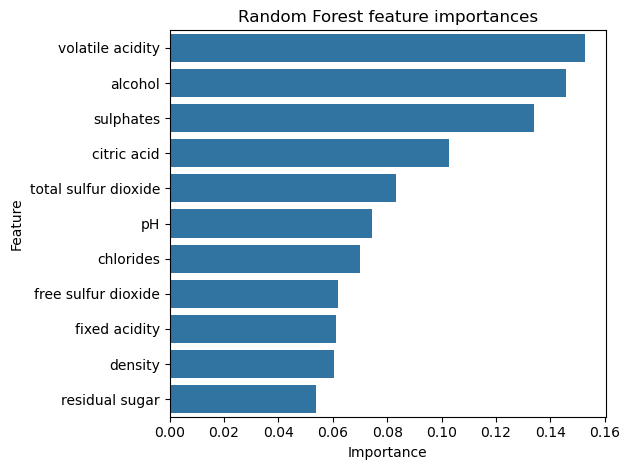

In [78]:
# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure()
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest feature importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()